## Jeffrey Elkner

### Problem 1: Binomial distribution

The maximum temperature reached on any day can be classified as above freezing (a success) or below freezing (a failure). In a certain city of eastern North America, January weather statistics indicate the probability a January day will be above freezing is .20. Use the binomial distribution to determine the probabilities in the following.

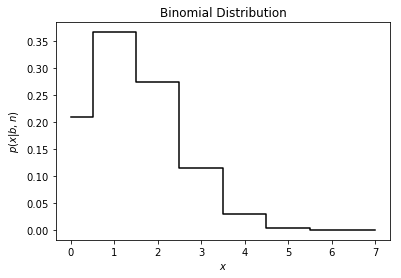

In [1]:
# SOLUTION: Before answering the following individual questions, generate a
# binomial distribution plot using
# http://www.astroml.org/book_figures/chapter3/fig_binomial_distribution.html
# as a reference.
from scipy.stats import binom
from matplotlib import pyplot as plt

dist = binom(7, 0.2)
x = range(0, 8)
plt.plot(x, dist.pmf(x), color='black', linestyle='steps-mid')
plt.xlabel('$x$')
plt.ylabel(r'$p(x|b, n)$')
plt.title('Binomial Distribution')
plt.show()

(a) Exactly two of the next seven January days will be above freezing; (3 points)

In [2]:
# SOLUTION
s = "The chance that exactly 2 of the next 7 days will"
s += " be above freezing is {}%."
print(s.format(round(dist.pmf(2) * 100, 3)))

The chance that exactly 2 of the next 7 days will be above freezing is 27.525%.


(b) More than five of the next seven days will be above freezing; (3 points)

In [3]:
# SOLUTION: More than 5 days will be above freezing during the next
# week (7 days) is satisfied if either 6 or 7 days are above freezing.
# Since these events are mutually exclusive, their combined probability
# is there sum.
s = "The chance that more than 5 of the next 7 days will be"
s += " above freezing is {}%."
print(s.format(round((dist.pmf(6) + dist.pmf(7)) * 100, 3)))

The chance that more than 5 of the next 7 days will be above freezing is 0.037%.


(c) There will be at least one day above freezing in the next seven days; (5 points)

In [4]:
# SOLUTION
s = "The chance that at least 1 of the next 7 days will be"
s += " above freezing is {}%."
chance = sum([dist.pmf(x) for x in range(1, 8)]) * 100
print(s.format(round(chance, 3)))

The chance that at least 1 of the next 7 days will be above freezing is 79.028%.


(d) All seven days in the next week will be above freezing; (3 points)

In [5]:
# SOLUTION
s = "The chance that all 7 of the next 7 days will be above"
s += " freezing is {}%."
print(s.format(round(dist.pmf(7) * 100, 3)))

The chance that all 7 of the next 7 days will be above freezing is 0.001%.


(e) All seven days in the next week will be above freezing if the given observed probability is 0.50 instead of 0.20; (2 points)

In [6]:
# SOLUTION
dist = binom(7, 0.5)
s = "The chance that all 7 of the next 7 days will be above"
s += " freezing is {}%."
print(s.format(round(dist.pmf(7) * 100, 3)))

The chance that all 7 of the next 7 days will be above freezing is 0.781%.


(f) Is this a reasonable application of the Binomial distribution? Why or why not? (4 points)

*Solution:* Since weather conditions are a spacial phenomenon (weather systems cover large, slow moving areas), the assumption that the temperature on a given day is completely independent of the temperature on nearby days does not seem reasonable.

### Problem 1: Poisson distribution

(a) Based on the results of HW2, we know that the average number of named storms in the Atlantic basin is 9 (8.79 actually) per year. Calculate and plot the Poisson distribution with λ=9 for x values from 0 to 28. (4 points)

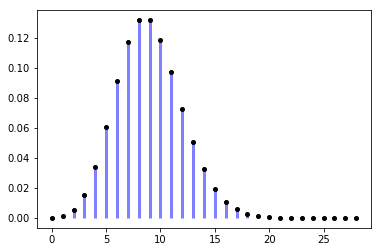

In [7]:
# SOLUTION: Using:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html
# as a reference.
from scipy.stats import poisson

dist = poisson(9)
x = range(0, 29)
y = dist.pmf(x)

plt.plot(x, y, 'ko', ms=4)
plt.vlines(x, 0, y, colors='b', lw=3, alpha=0.5)
plt.show()

(b) For a given year, what are the chances (probabilities) that the area will have no named storm, 16 named storms, and 28 named storms? (6 points)

In [8]:
# SOLUTION
s = "The chance that the area will have {} named storms is {:.5f}%."
for numstorms in 0, 16, 28:
    print(s.format(numstorms, dist.pmf(numstorms) * 100))

The chance that the area will have 0 named storms is 0.01234%.
The chance that the area will have 16 named storms is 1.09297%.
The chance that the area will have 28 named storms is 0.00002%.


(c) Based on the above results, for a sufficiently long time, on average, in how many years, there will be 28 named storms in the area in a given year? 16 named storms? In other words, what are the return periods for 28 named storms in a year and for 16 named storms? Do you believe these numbers? Why? (Note: This is an open question, bonus points will be issued to unexpected and reasonable answers.) (10 points)

> Hint: please read the hint page for part c on the definition of return periods.

In [9]:
# SOLUTION
# We are looking for the return period in this question, and the
# following wikipedia article was helpful to me in trying to understand
# this better: https://en.wikipedia.org/wiki/Return_period
s = "We should expect to see {} named storms occur once in about {} years."
for numstorms in 28, 16:
    print(s.format(numstorms, int(round(1 / dist.pmf(numstorms)))))

We should expect to see 28 named storms occur once in about 4720640 years.
We should expect to see 16 named storms occur once in about 91 years.


Are these results reasonable?  Any statistical predication about a system that is undergoing change, especially long term predictions, are suspect.  The experience of this past storm season, for example, which set records in terms of storm severity and damage, appears to be related to the warming trend in oceanic temperatures. If that is indeed the case, we can expect any model which assumed ocean temperature as a constant to be invalid.

### Problem 2: Normal Distribution

Suppose that we have a z-score of value 2.5, z<sub>0</sub>,

(a) What is the probability of p(z ≤ z<sub>0</sub>)? (3 points)

In [10]:
# SOLUTION: With the help of some useful resources:
# https://docs.scipy.org/doc/scipy-0.16.1/reference/generated/scipy.stats.norm.html
# https://stackoverflow.com/q/20864847
from scipy.stats import norm

s = "The chance that z is less than or equal to 2.5 standard"
s += " deviations\nabove the norm is {}%."
print(s.format(round(norm.cdf(2.5) * 100, 3)))

The chance that z is less than or equal to 2.5 standard deviations
above the norm is 99.379%.


> *Note*: This result is consistant with the value of 0.994 for z = 2.50 and P(Z < z) in Table A-3 on page 627 of our text.

(b) What is the probability of p(z ≥ z<sub>0</sub>)? (2 points)

In [11]:
s = "The chance that z is greater than or equal to 2.5 standard"
s += "deviations\nabove the norm is {}%."
print(s.format(round((1 - norm.cdf(2.5)) * 100, 3)))

The chance that z is greater than or equal to 2.5 standarddeviations
above the norm is 0.621%.


(c) What is the probability of p(-z<sub>0</sub> ≤ z ≤ z<sub>0</sub>)? (3 points)

In [12]:
s = "The chance that z is between -2.5 and 2.5 standard deviations"
s += "\nfrom the norm is {}%."
print(s.format(round((norm.cdf(2.5) - norm.cdf(-2.5)) * 100, 3)))

The chance that z is between -2.5 and 2.5 standard deviations
from the norm is 98.758%.


(d) What is the probability of p(z<sub>0</sub> ≤ |z|)? (4 points)

In [13]:
s = "The chance that z is either less than -2.5 or greater than"
s += "\n2.5 standard deviations from the norm is {}%."
print(s.format(round((norm.cdf(-2.5) + (1 - norm.cdf(2.5))) * 100, 3)))

The chance that z is either less than -2.5 or greater than
2.5 standard deviations from the norm is 1.242%.


> Note: (z<sub>0</sub> is not involved in the following questions)

(e) What is the z-score (z<sub>found</sub>) such that p(z ≥ z<sub>found</sub>) = 0.01? (4 points)

In [14]:
s = "The z-score with a 1% chance of being exceeded is {}."
print(s.format(round(norm.ppf(0.99), 3)))

The z-score with a 1% chance of being exceeded is 2.326.


> *Note*: This result is consistant with the value of z = 2.30 for P(Z < -z) = 0.011 in Table A-3 of our text.

What is the z-score (z<sub>found</sub>) such that p(|z| ≥ z<sub>found</sub>) = 0.01? (4 points)

In [15]:
# SOLUTION: Since the normal function is symmetrical, the result here
# will be the same as P(Z >= z_found) = 0.005, so it is given by:
s = "The z-score such that the chance is 1% that the z value will be"
s+= "\neither greater than it or less than it's negative is {}."
print(s.format(round(norm.ppf(0.99), 3)))

The z-score such that the chance is 1% that the z value will be
either greater than it or less than it's negative is 2.326.
